# EDA part2


In [ ]:
!pip install koreanize-matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [ ]:
place = pd.read_excel('jeju_place.xlsx')
place.head()

In [ ]:
place.info()

In [ ]:
place.describe()

In [ ]:
# 순위 칼럼을 인덱스로
place = place.set_index('순위')
place

In [ ]:
# 광역시/도에 제주도만 있는 지 확인  -> drop
place['광역시/도'].unique()

array(['제주특별자치도'], dtype=object)

In [ ]:
place = place.drop('광역시/도', axis=1)
place

In [ ]:
# 장소데이터 -> 중분류 여러 개 -> drop(x) -> 중분류 기준으로 데이터를 나눠볼 순 있다.
place['중분류 카테고리'].unique

<bound method Series.unique of 0       기타관광
1         쇼핑
2         쇼핑
3       자연관광
4       자연관광
       ...  
495    레저스포츠
496     기타관광
497     역사관광
498     문화관광
499    레저스포츠
Name: 중분류 카테고리, Length: 500, dtype: object>

In [ ]:
place.isna().sum()

순위          0
관광지명        0
시/군/구       0
도로명주소       0
중분류 카테고리    0
소분류 카테고리    0
검색건수        0
dtype: int64

In [ ]:
# 중분류
mid_cat = place['중분류 카테고리'].value_counts() # 제주도 관광지 검색 중 자연관광 영역이 가장 많이 검색됐다.

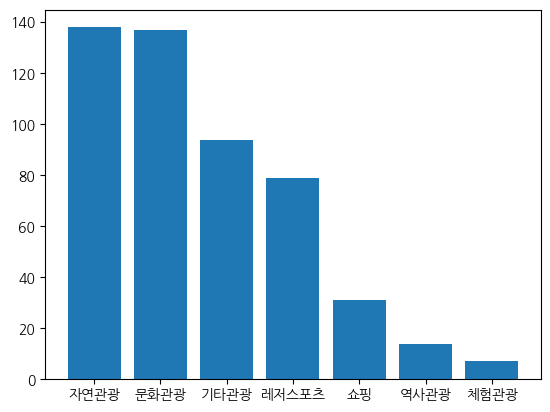

In [ ]:
plt.bar(mid_cat.index, mid_cat)
plt.show()

In [ ]:
low_cat = place['소분류 카테고리'].value_counts()
low_cat

자연경관(하천/해양)    79
기타관광           61
육상레저스포츠        50
전시시설           43
자연경관(산)        38
테마공원           29
도시공원           27
시장             18
데이트코스          18
기타레저스포츠        16
교통시설           15
수상레저스포츠        13
복합관광시설         13
공연시설           12
자연공원           11
역사유적지           9
대형마트            9
기타문화관광지         8
자연관광(산)         8
농/산/어촌체험        6
종교성지            5
면세점             3
랜드마크관광          3
자연생태            2
레저스포츠시설         2
웰니스관광           1
쇼핑몰             1
Name: 소분류 카테고리, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

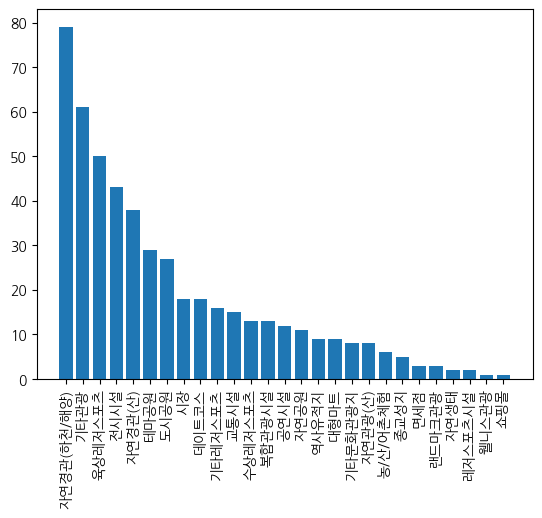

In [ ]:
plt.bar(low_cat.index,low_cat)
plt.xticks(rotation=90)
plt.show

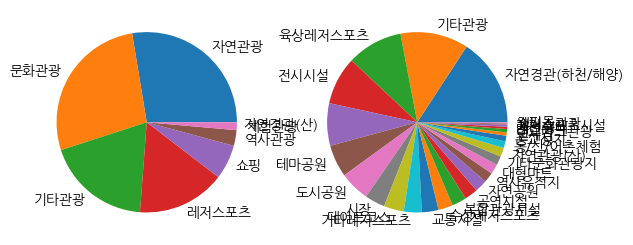

In [ ]:
# pie chart: 전체에서 부분이 어느 정도 차지하고 있느냐

# 중분류
plt.subplot(1,2,1)
plt.pie(mid_cat, labels=mid_cat.index)

# 소분류
plt.subplot(1,2,2)
plt.pie(low_cat, labels=low_cat.index)
plt.show()


In [ ]:
# 소분류 카테고리의 경우 -> 상위 10개 값만 이용
print(low_cat.head(10))
# print(low_cat[:10])

자연경관(하천/해양)    79
기타관광           61
육상레저스포츠        50
전시시설           43
자연경관(산)        38
테마공원           29
도시공원           27
시장             18
데이트코스          18
기타레저스포츠        16
Name: 소분류 카테고리, dtype: int64

In [ ]:
# place 데이터프레임에서 소분류 상위 10개 값

# place['소분류 카테고리'].head(10)
# place['소분류 카테고리'].value_counts
# a = place['소분류 카테고리'].value_counts().to_frame()
# a[:10]
# order_low = place['소분류 카테고리'].value_counts().head(10)
# place[['소분류 카테고리', '검색건수']][place['소분류 카테고리'].value_counts().head(10).values]
# low_cat = place['소분류 카테고리'].value_counts()
# low_cat_df = pd.DataFrame(low_cat)
# low_cat_df

# place['소분류 카테고리'].value_counts().head(10).to_frame()

# 기존에 가지고 있던 데이터셋 기준이 아니라 새롭게 정렬 -> 조건이 될 수 없다.
# place['소분류 카테고리'].value_counts().head(10)

top_low = place['소분류 카테고리'].value_counts().head(10).index
top_low

In [ ]:
place[place["소분류 카테고리"].isin(place["소분류 카테고리"].value_counts()[:10].index)]

,순위,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
1,2,동문재래시장,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,301089
2,3,서귀포매일올레시장,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,267930
3,4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
4,5,성산일출봉,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),195037
5,6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
...,...,...,...,...,...,...,...
490,491,새미은총의동산,제주시,제주 제주시,문화관광,도시공원,1936
493,492,금능해안도로,제주시,제주 제주시,기타관광,데이트코스,1923
494,495,조천만세동산,제주시,제주 제주시,문화관광,도시공원,1913
496,497,쉬리의언덕,서귀포시,제주 서귀포시,기타관광,기타관광,1908


In [ ]:
# 자연경관
nature = place[place['소분류 카테고리'] == '자연경관(하천/해양)']
nature

,순위,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
3,4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477
5,6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252
6,7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970
9,10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702
21,22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488
...,...,...,...,...,...,...,...
454,455,하효항,서귀포시,제주 서귀포시 쇠소깍로 0-0,자연관광,자연경관(하천/해양),2292
473,474,구두미포구,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),2068
482,483,제주항,제주시,제주 제주시 임항로 97-0,자연관광,자연경관(하천/해양),1997
484,485,김녕포구,제주시,제주 제주시,자연관광,자연경관(하천/해양),1974


In [ ]:
nature['검색건수'].sum()

In [ ]:
nature['관광지명'].unique() # nature 자연경관 -> 바다에 관련된 정보

In [ ]:
# 관광지 초점 -> 항구, 포구, 염점, 부두, 저수기 .. 제외 -> 해수욕장

# '항' 삭제
nature = nature.drop(labels=nature[nature['관광지명'].str[-1]== '항'].index, axis=0)

In [ ]:
nature['관광지명'].unique()

array(['함덕해수욕장', '협재해수욕장', '이호테우해변', '곽지해수욕장', '김녕해수욕장', '금능해수욕장',
       '중문색달해변', '월정리해변', '표선해수욕장', '광치기해변', '사계해수욕장', '세화해수욕장', '판포포구',
       '제주항제6부두', '삼양해수욕장', '제주항제4부두', '황우지해안', '화순금모래해변', '법환포구', '한담해변',
       '홍조단괴해빈', '논짓물', '검멀레해수욕장', '구엄리돌염전', '하도해수욕장', '평대리해수욕장',
       '신양섭지해수욕장', '코난비치', '비양도', '오조포구', '제주항제2부두', '제주항제3부두', '보목포구',
       '신창풍차해안', '가파도', '하고수동해수욕장', '대평포구', '차귀도', '신도포구', '강정포구', '코난해변',
       '용수리포구', '제주항제9부두', '월령포구', '자구내포구', '구엄포구', '종달리해변', '제주항제7부두',
       '하모해수욕장', '세기알해변', '고내포구', '차귀도포구', '쇠소깍해변', '월평포구', '대포포구',
       '남원포구', '신흥해수욕장', '영락리방파제', '용담포구', '소금막해변', '수산저수지', '구두미포구',
       '김녕포구', '동일리포구'], dtype=object)

In [ ]:
# '포구' 삭제
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:]== '포구'].index, axis=0)
nature['관광지명'].unique()

array(['함덕해수욕장', '협재해수욕장', '이호테우해변', '곽지해수욕장', '김녕해수욕장', '금능해수욕장',
       '중문색달해변', '월정리해변', '표선해수욕장', '광치기해변', '사계해수욕장', '세화해수욕장',
       '제주항제6부두', '삼양해수욕장', '제주항제4부두', '황우지해안', '화순금모래해변', '한담해변',
       '홍조단괴해빈', '논짓물', '검멀레해수욕장', '구엄리돌염전', '하도해수욕장', '평대리해수욕장',
       '신양섭지해수욕장', '코난비치', '비양도', '제주항제2부두', '제주항제3부두', '신창풍차해안', '가파도',
       '하고수동해수욕장', '차귀도', '코난해변', '제주항제9부두', '종달리해변', '제주항제7부두', '하모해수욕장',
       '세기알해변', '쇠소깍해변', '신흥해수욕장', '영락리방파제', '소금막해변', '수산저수지'],
      dtype=object)

In [ ]:
# 부두로 끝나는곳 지우기
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:]== '부두'].index, axis=0)
nature['관광지명'].unique()

# 염전
nature = nature.drop(labels=nature[nature['관광지명'].str[-2:]== '염전'].index, axis=0)
nature['관광지명'].unique()

# 저수지
nature = nature.drop(labels=nature[nature['관광지명'].str[-3:]== '저수지'].index, axis=0)
nature['관광지명'].unique()

# 방파제
nature = nature.drop(labels=nature[nature['관광지명'].str[-3:]== '방파제'].index, axis=0)
nature['관광지명'].unique()

array(['함덕해수욕장', '협재해수욕장', '이호테우해변', '곽지해수욕장', '김녕해수욕장', '금능해수욕장',
       '중문색달해변', '월정리해변', '표선해수욕장', '광치기해변', '사계해수욕장', '세화해수욕장', '삼양해수욕장',
       '황우지해안', '화순금모래해변', '한담해변', '홍조단괴해빈', '논짓물', '검멀레해수욕장', '하도해수욕장',
       '평대리해수욕장', '신양섭지해수욕장', '코난비치', '비양도', '신창풍차해안', '가파도', '하고수동해수욕장',
       '차귀도', '코난해변', '종달리해변', '하모해수욕장', '세기알해변', '쇠소깍해변', '신흥해수욕장',
       '소금막해변'], dtype=object)

In [ ]:
# 정리된 바다 데이터의 기초 통계 확인
nature.describe()

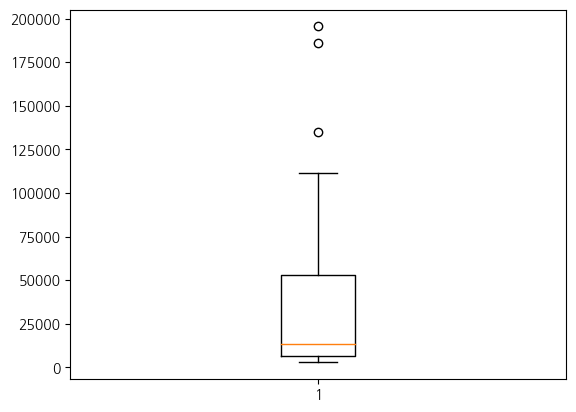

In [ ]:
# q1, q2, q3 * 1.5 -> 초과: 이상치 -> 검색량이 너무 많다 -> 혼잡도가 높다.

plt.boxplot(nature['검색건수'])
plt.show()

In [ ]:
# 상위 경계값 -> 혼잡도가 높다
# q3 - q1
IQR = 53093 - 6737
upper_IQR = (IQR * 1.5) + 53093
upper_IQR

122627.0

In [ ]:
import numpy as np

In [ ]:
# 상위 경계값을 초과하는 값들을 지워준다.
# 이상치이기 때문에 인기가 많고 혼잡할 것이다.
nature['혼잡도'] = np.where(nature['검색건수'] > upper_IQR, '혼잡', '보통')
nature

,순위,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,혼잡도
3,4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477,혼잡
5,6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252,혼잡
6,7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970,혼잡
9,10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702,보통
21,22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488,보통
22,23,금능해수욕장,제주시,제주 제주시 금능길 119-10,자연관광,자연경관(하천/해양),77609,보통
28,29,중문색달해변,서귀포시,제주 서귀포시 중문관광로72번길 0-0,자연관광,자연경관(하천/해양),61889,보통
31,32,월정리해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),58431,보통
32,33,표선해수욕장,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),56866,보통
39,40,광치기해변,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),49320,보통


In [ ]:
# 제주시, 서귀포시 바다
j = nature[nature['시/군/구'] == '제주시']
j.head()

,순위,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,혼잡도
3,4,함덕해수욕장,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),195477,혼잡
5,6,협재해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),186252,혼잡
6,7,이호테우해변,제주시,제주 제주시,자연관광,자연경관(하천/해양),134970,혼잡
9,10,곽지해수욕장,제주시,제주 제주시,자연관광,자연경관(하천/해양),111702,보통
21,22,김녕해수욕장,제주시,제주 제주시 해맞이해안로 7-6,자연관광,자연경관(하천/해양),78488,보통


In [ ]:
# 제주시, 서귀포시 바다
s = nature[nature['시/군/구'] == '서귀포시']
s.head()

,순위,관광지명,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,혼잡도
28,29,중문색달해변,서귀포시,제주 서귀포시 중문관광로72번길 0-0,자연관광,자연경관(하천/해양),61889,보통
32,33,표선해수욕장,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),56866,보통
39,40,광치기해변,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),49320,보통
42,43,사계해수욕장,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),48751,보통
104,105,황우지해안,서귀포시,제주 서귀포시,자연관광,자연경관(하천/해양),17177,보통


In [ ]:
# groupby  숫자가 있고 비교하고싶을 때 사용?
groupby_city = nature.groupby('시/군/구')['검색건수'].sum()
groupby_city

시/군/구
서귀포시     289143
제주시     1016123
Name: 검색건수, dtype: int64

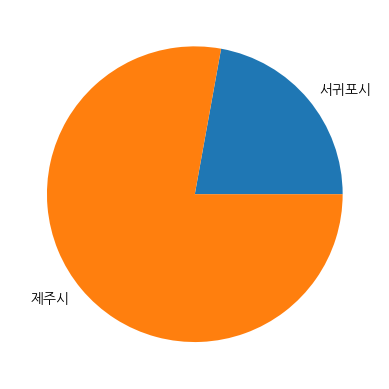

In [ ]:
# nature 검색수 안에서 제주시, 서귀포시가 어느 정도 검색량을 차지하고 있는지
labels = ['서귀포시','제주시']
plt.pie(groupby_city, labels=labels)
plt.show()

# 코로나 지역별 데이터

In [ ]:
region = pd.read_csv('region.csv')
region.head()

,day,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
0,2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0,3526
1,2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0,4212
2,2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0,4812
3,2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0,5328
4,2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0,5766


In [ ]:
region.shape

(32, 20)

In [ ]:
# set index
region = region.set_index('day')
region

In [ ]:
region.info()

In [ ]:
# weather_df.index = pd.to_datetime(weather_df.index, format='%Y-%m-%d')
region.index = pd.to_datetime(region.index, format='%Y-%m-%d')
region.head()

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역,총확진자수
day,,,,,,,,,,,,,,,,,,,
2020-03-01,82,81,2569,6,9,13,17,1,84,7,11,60,5,3,514,62,2,0,3526
2020-03-02,91,88,3081,7,9,14,20,1,92,19,11,78,6,5,624,64,2,0,4212
2020-03-03,98,90,3601,7,11,14,20,1,94,20,11,81,7,5,685,64,3,0,4812
2020-03-04,99,93,4006,9,13,15,23,1,101,21,11,82,7,5,774,65,3,0,5328
2020-03-05,103,92,4326,9,14,16,23,1,110,23,12,86,7,5,861,74,4,0,5766


In [ ]:
region.info()

In [ ]:
region.isnull().sum()

서울       0
부산       0
대구       0
인천       0
광주       0
대전       0
울산       0
세종       0
경기       0
강원       0
충북       0
충남       0
전북       0
전남       0
경북       0
경남       0
제주       0
검역       0
총확진자수    0
dtype: int64

In [ ]:
# 전국 확진자수
# region.iloc[0:2]  # iloc -> 행으로 접근한 열
# cities = ['서울', '부산', '대구', '인천', '광주', '대전']
cities = region.loc[:, region.columns[:-1]]

In [ ]:
region.columns[:-1]

Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '검역'],
      dtype='object')

In [ ]:
total = region.loc[:,'총확진자수']
total.head()

day
2020-03-01    3526
2020-03-02    4212
2020-03-03    4812
2020-03-04    5328
2020-03-05    5766
Name: 총확진자수, dtype: int64

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

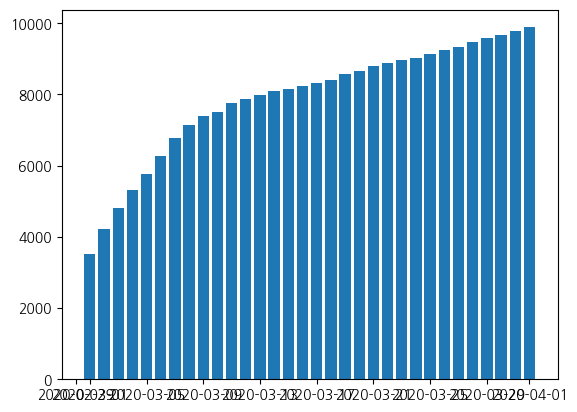

In [ ]:
# bar graph

plt.bar(total.index, total)
plt.show()

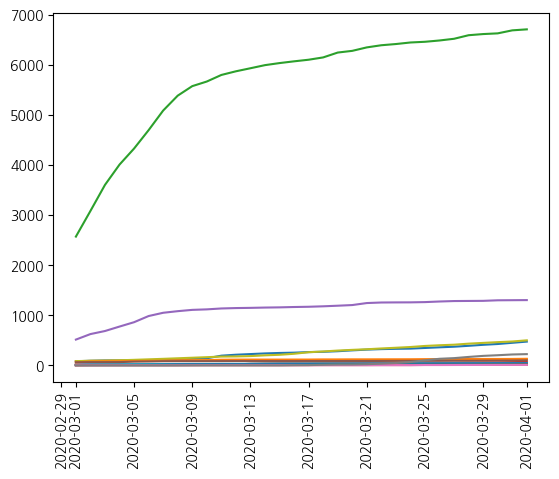

In [ ]:
# 지역별 그래프
# 지역(y)만 다르고 인덱스(x) 동일
# 하나의 영역 안에 여러 그래프
# Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
#       '전북', '전남', '경북', '경남', '제주', '검역'],
#      dtype='object')

plt.xticks(rotation=90)
plt.plot(cities)
# plt.plot(cities['부산'])
plt.show()
'''
그래프가 식별이 잘 되지 않을 때,
그래프의 범위를 바꿔주거나 or 그래프를 사용
'''

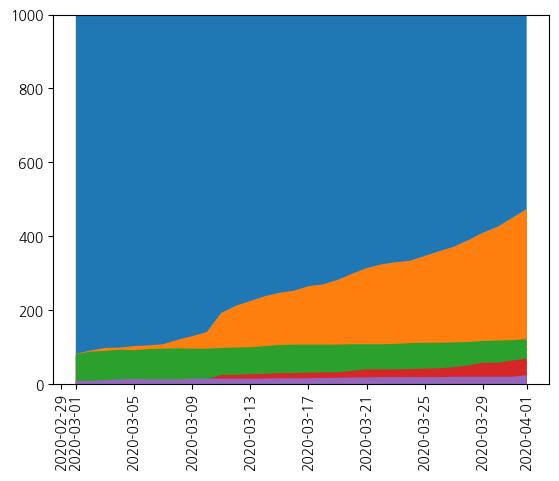

In [94]:
# 시간 흐름에 따른 확진자 수 누적 그래프
# plt.stackplot(x, y1, y2, y3 , ... , labels=)
y1 = cities['서울']
y2 = cities['대구']
y3 = cities['부산']
y4 = cities['인천']
y5 = cities['광주']
labels = ['서울', '대구', '부산', '인천', '광주']
colors = ['red', 'black']

# 누적 그래프 -> 어떤 게 누적될 것인지 -> 시간 순에 따라 정렬
# 쌓이는 방향, 시간순에 따라 쌓이는 부분 -> 각 지역별 데이터마다 누적 확인
plt.stackplot(cities.index, y2)  # 값이 큰 데이터 먼저 출력?
plt.stackplot(cities.index, y1)
plt.stackplot(cities.index, y3)
plt.stackplot(cities.index, y4)
plt.stackplot(cities.index, y5)

# plt.xlim([])
plt.ylim([0, 1000])  # y축 범위 0~1000으로 설정
# plt.axis([x최소, x최대, y최소, y최대]) 이렇게 설정도 가

plt.xticks(rotation=90)  # 가로 표시 설정?
# plt.legend(loc='upper left')
plt.show()

In [ ]:
# 제주 지역 확진자
region.head()

In [97]:
jeju = region['제주']  # 인덱스 / 확진자 수  -> 시리즈 형태

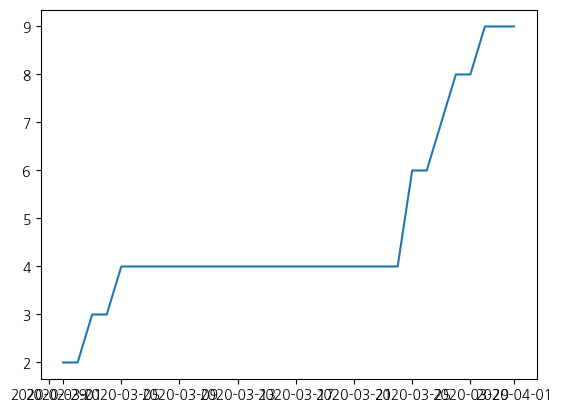

In [98]:
plt.plot(jeju)
plt.show()

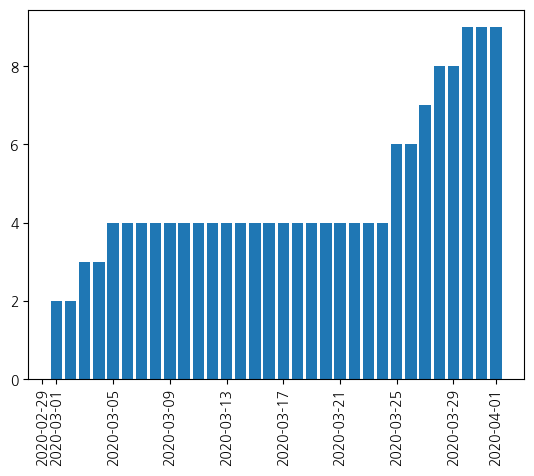

In [110]:
# 데이터 시각화 -> 어떤 구간에 (큰)변화가 있는 지
plt.bar(jeju.index, jeju)
plt.xticks(rotation=90)

plt.show()

## 변화폭을 민감하게 살펴보자
# 마스크 해지 -> (코로나)감염이 얼마 증가 감소
# 독감, 폐렴은 얼마나 증가하는지

In [ ]:
plt.plot(jeju)
# annotation -> 선그래프에 표시할 때
# plt.annotate('변화', xy=(x,y), xytext=(), arrowprops={}})
# xy=(x,y) -> 부분의,  xytext=() -> 의 값을, arrowprops={}} ->의 화살표 모양으로
# plt.annotate('변화', xy=(25,6), xytext=(25,6), arrowprops={'color':'green'})
plt.show()

In [126]:
# 코로나 지역별 데이터
# 지역명 -> 실제 좌표의 위치
# 좌표 데이터 -> 시청, 도청 -> 위도, 경도
loc = {
  '서울' : [37.566418, 126.977950],#서울시청
  '부산' : [35.180152, 129.074980],#부산시청
  '대구' : [35.871468, 128.601757],#대구시청
  '인천' : [37.456445, 126.705873],#인천시청
  '광주' : [35.160068, 126.851426],#광주광역시청
  '대전' : [36.350664, 127.384819],#대전시청
  '울산' : [35.539772, 129.311486],#울산시청
  '세종' : [36.480838, 127.289181],#세종시청
  '경기' : [37.275221, 127.009382],#경기도청
  '강원' : [37.885300, 127.729835],#강원(강원도청)
  '충북' : [36.635947, 127.491345],#충북도청
  '충남' : [36.658826, 126.672849],#충남도청
  '전북' : [35.820599, 127.108759],#전북도청
  '전남' : [34.816351, 126.462924],#전남도청
  '경북' : [36.574108, 128.509303],#경북도청
  '경남' : [35.238398, 128.692371],#경남도청
  '제주' : [33.3617007, 126.511657]#제주
    }
type(loc)

dict

In [131]:
# 위도: latitude, 경도: longitude
loc = pd.DataFrame(loc).T
loc.columns = ['lat','lon']
loc

,lat,lon
서울,37.566418,126.977950
부산,35.180152,129.074980
대구,35.871468,128.601757
인천,37.456445,126.705873
광주,35.160068,126.851426
대전,36.350664,127.384819
울산,35.539772,129.311486
세종,36.480838,127.289181
경기,37.275221,127.009382
강원,37.885300,127.729835


In [ ]:
# 지도 관련 라이브러리
!pip install folium

In [133]:
import folium

In [286]:
# map_osm = folium.Map(location=[위도,경도])
map_osm = folium.Map(location=[33.361701,126.511657], zoom_start=10)
map_osm

In [288]:
# 지도 위에 해당하는 지역의 확진자수를 표시
from folium.plugins import MarkerCluster

# 마커 클러스터 사용을 위한 선언
marker_cluster = MarkerCluster().add_to(map_osm)

# folium.Marker([위도,경도], popup=, icon = folium.Icon(color='red',icon='start')).add_to(marker_cluster)
jeju = [33.361701,126.511657]
#folium.Marker(jeju, popup=jeju, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)

map_osm

In [ ]:
region.sum()

In [289]:
# 각 지역별로 마커찍기
# 지역별 확진자 합

# 지도 관련 라이브러리
!pip install folium
import folium

# map_osm = folium.Map(location=[위도,경도])
map_osm = folium.Map(location=[33.361701,126.511657], zoom_start=10)

# 지도 위에 해당하는 지역의 확진자수를 표시
from folium.plugins import MarkerCluster

# 마커 클러스터 사용을 위한 선언
marker_cluster = MarkerCluster().add_to(map_osm)

# folium.Marker([위도,경도], popup=, icon = folium.Icon(color='red',icon='start')).add_to(marker_cluster)

seoul = [37.566418, 126.977950]
busan = [35.180152, 129.074980]
daegu = [35.871468, 128.601757]
incheon = [37.456445, 126.705873]
gwangju = [35.160068, 126.851426]
daejeon = [36.350664, 127.384819]
ulsan = [35.539772, 129.311486]
sejong = [36.480838, 127.289181]
gyeonggi = [37.275221, 127.009382]
gangwon = [37.885300, 127.729835]
chungbuk = [36.635947, 127.491345]
chungnam = [36.658826, 126.672849]
jeonbuk = [35.820599, 127.108759]
jeonnam = [34.816351, 126.462924]
gyeongbuk = [36.574108, 128.509303]
gyeongnam = [35.238398, 128.692371]
jeju = [33.361701,126.511657]

folium.Marker(seoul, popup=8092, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker(busan, popup=3329, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker(daegu, popup=182656, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker(incheon, popup=975, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker(gwangju, popup=522, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker(daejeon, popup=727, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker(ulsan, popup=963, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker(sejong, popup=888, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker(gyeonggi, popup=8404, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker(gangwon, popup=906, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker(chungbuk, popup=941, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker(chungnam, popup=3518, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker(jeonbuk, popup=277, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker(jeonnam, popup=181, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker(gyeongbuk, popup=35736, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker(gyeongnam, popup=2692, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)
folium.Marker(jeju, popup=152, icon=folium.Icon(color='red', icon='star')).add_to(marker_cluster)

map_osm

# 코로나 한국 데이터

In [ ]:
kr = pd.read_csv('total_.csv')
kr.head()

In [ ]:
kr.tail()

In [ ]:
kr = kr.set_index('date')
kr.head()

In [ ]:
kr.info()

In [149]:
kr.describe()

,총계,확진자,격리해제,격리중,사망,검사중,결과 음성
count,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000
mean,272659.468750,7892.531250,1952.28125,5851.031250,86.062500,18708.312500,246058.656250
std,96168.245376,1661.299996,1962.49330,1213.763847,44.247061,5765.846459,99218.729994
min,96985.000000,3526.000000,30.00000,3479.000000,17.000000,13531.000000,61037.000000
25%,194593.000000,7320.000000,157.00000,4728.750000,50.750000,15384.750000,169335.500000
50%,280610.000000,8278.500000,1269.00000,5984.500000,78.000000,16738.500000,256201.000000
75%,350910.500000,9062.000000,3562.75000,6971.500000,121.500000,18749.000000,326699.000000
max,421547.000000,9887.000000,5567.00000,7470.000000,165.000000,35555.000000,395075.000000


In [271]:
kr.index = pd.to_datetime(kr.index, format='%Y-%m-%d')
kr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-03-01 to 2020-04-01
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   총계      32 non-null     int64
 1   확진자     32 non-null     int64
 2   격리해제    32 non-null     int64
 3   격리중     32 non-null     int64
 4   사망      32 non-null     int64
 5   검사중     32 non-null     int64
 6   결과 음성   32 non-null     int64
dtypes: int64(7)
memory usage: 2.0 KB


In [152]:
kr.isnull().sum()

총계       0
확진자      0
격리해제     0
격리중      0
사망       0
검사중      0
결과 음성    0
dtype: int64

In [156]:
# 확진자 (양성)
print(kr['확진자'])
print(kr['결과 음성'])

date
2020-03-01    3526
2020-03-02    4212
2020-03-03    4812
2020-03-04    5328
2020-03-05    5766
2020-03-06    6284
2020-03-07    6767
2020-03-08    7134
2020-03-09    7382
2020-03-10    7513
2020-03-11    7755
2020-03-12    7869
2020-03-13    7979
2020-03-14    8086
2020-03-15    8162
2020-03-16    8236
2020-03-17    8321
2020-03-18    8413
2020-03-19    8565
2020-03-20    8652
2020-03-21    8799
2020-03-22    8897
2020-03-23    8961
2020-03-24    9037
2020-03-25    9137
2020-03-26    9241
2020-03-27    9332
2020-03-28    9478
2020-03-29    9583
2020-03-30    9661
2020-03-31    9786
2020-04-01    9887
Name: 확진자, dtype: int64
date
2020-03-01     61037
2020-03-02     71580
2020-03-03     85484
2020-03-04    102965
2020-03-05    118965
2020-03-06    136624
2020-03-07    151802
2020-03-08    162008
2020-03-09    171778
2020-03-10    184179
2020-03-11    196100
2020-03-12    209402
2020-03-13    222728
2020-03-14    235615
2020-03-15    243778
2020-03-16    251297
2020-03-17    261105
2

In [209]:
# 데이터 타입들 중 칼럼들이 서로 상관성이 있거나 반대 성향(경향)이 있으면 서로 비교 -> 상관관계, 계수
pos = kr['확진자']
neg = kr['결과 음성']

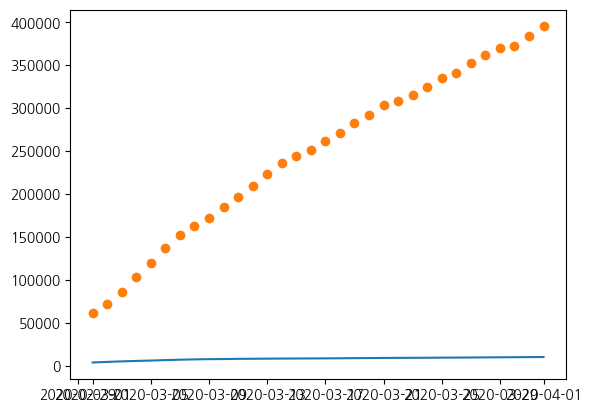

In [160]:
plt.plot(pos)
plt.plot(neg, 'o')

plt.show()

In [210]:
# 두 데이터(칼럼)를 합쳐서 하나의 결과를 도출
# 확진자 수 중 사망 -> 치사율
# 확진자 수: pos
pos
death = kr['사망']
# death / pos * 100 -> 비율

# 치사율
d_p = round((death / pos) * 100,2)
d_p.head()

date
2020-03-01    0.48
2020-03-02    0.52
2020-03-03    0.58
2020-03-04    0.60
2020-03-05    0.61
dtype: float64

In [211]:
# 완치율
# 확진자 수
# 격리해제 수
rec = kr['격리해제']

# rec / pos * 100 -> 비율

r_p = round((rec / pos) * 100,2)
r_p.head()

date
2020-03-01    0.85
2020-03-02    0.74
2020-03-03    0.71
2020-03-04    0.77
2020-03-05    1.53
dtype: float64

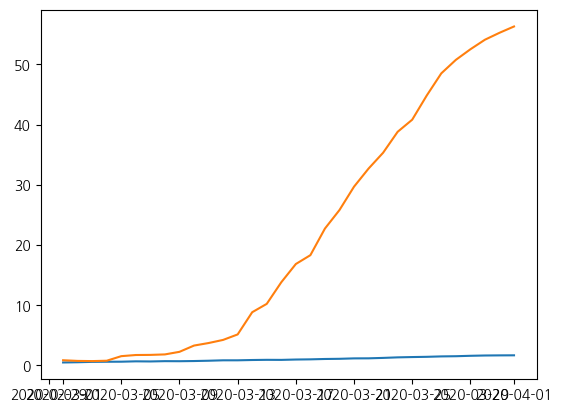

In [180]:
# 치명율, 완치율 -> 그래프로 그려봤을 때 완치율이 눈에 띄게(유의미하게) 증가

plt.plot(d_p)
plt.plot(r_p)
plt.show()

In [ ]:
# 3월 데이터
# 사망율, 완치율 -> 파이

# 4월 데이터
# 사망율, 완치율 -> 파이

In [ ]:
# 사망율과 완치율을 표현 가능

# 시계열 데이터 -> 흐름, 변화

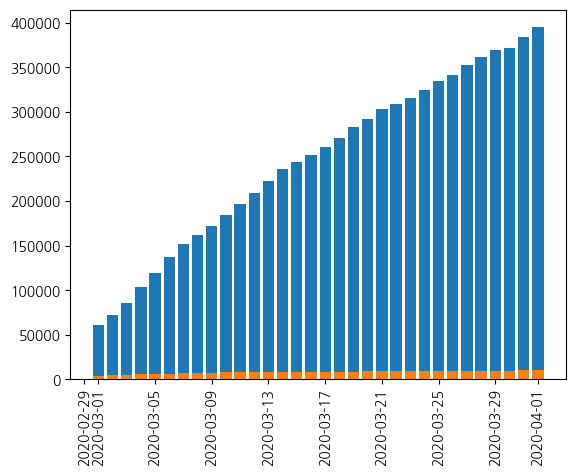

In [167]:
# 양성 음성 -> 반대되는 데이터
# 가로(x):시간,  세로(y): 수
# 가로: 비교할 데이터 -> 양성, 음성
# 추가 설명: index(datetime) + timedelta
# w = 0.25
plt.xticks(rotation=90)
plt.bar(neg.index, neg)
plt.bar(pos.index, pos)

plt.show()

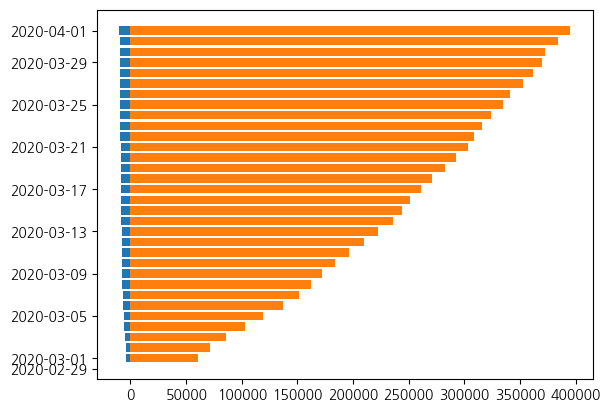

In [166]:
plt.barh(kr.index, -pos)      # barh -> 아래 그래프처럼 나오게 할 때
plt.barh(kr.index, neg)

plt.show()

In [205]:
# 양성(총 합), 음성(총 합)
sum_p = pos.sum()
sum_p

sum_n = neg.sum()
sum_n

7873877

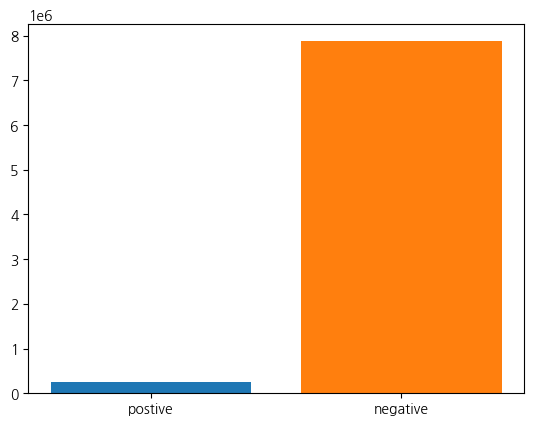

In [171]:
plt.bar('postive',sum_p)
plt.bar('negative',sum_n)
plt.show()  # 비교되는 두 가지는 딱 두 가지가 시각적으로 들어오게

In [181]:
# 사망자 수, 치명율

death.head()

date
2020-03-01    17
2020-03-02    22
2020-03-03    28
2020-03-04    32
2020-03-05    35
Name: 사망, dtype: int64

In [182]:
d_p.head()

date
2020-03-01    0.48
2020-03-02    0.52
2020-03-03    0.58
2020-03-04    0.60
2020-03-05    0.61
dtype: float64

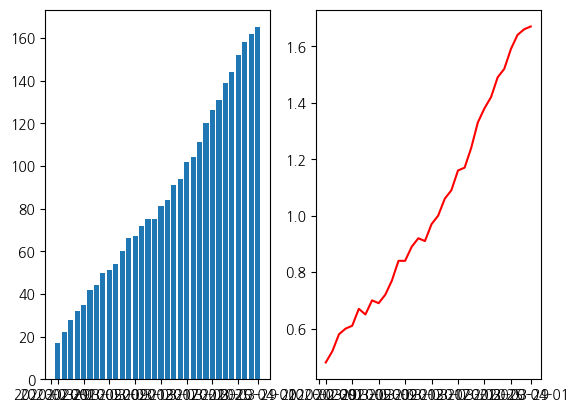

In [185]:
plt.subplot(1,2,1)
plt.bar(death.index, death)

plt.subplot(1,2,2)
plt.plot(d_p, '-r')
plt.show()

In [ ]:
# 전체 - 부분
# 어떤 값이 전체에서 어느 정도 차지하고 있느냐

# 시계열 -> 변화, 흐름
# 1. 경향(성)  -> 크게 변하는 시점 (상승, 하강, 반복)
# 2. 비율 -> 시간에 흐름에 따라 특정한 부분이 얼마나 영향을 끼치고 있는지: 흐름, 변화


# 확진자 중 사망자(얼마나), 완치자(얼마나): 일별
# 격리중, 격리 해제 비율
# 검사 중 양성, 음성 비율
# 주말 전 후 양성 비율 변화
# 주말 전 후 검사량

In [273]:
# 확진자 중 사망자(얼마나), 완치자(얼마나): 일별
print(death.head())  # 사망
print(rec.head())  # 격리해제

date
2020-03-01    17
2020-03-02    22
2020-03-03    28
2020-03-04    32
2020-03-05    35
Name: 사망, dtype: int64
date
2020-03-01    30
2020-03-02    31
2020-03-03    34
2020-03-04    41
2020-03-05    88
Name: 격리해제, dtype: int64


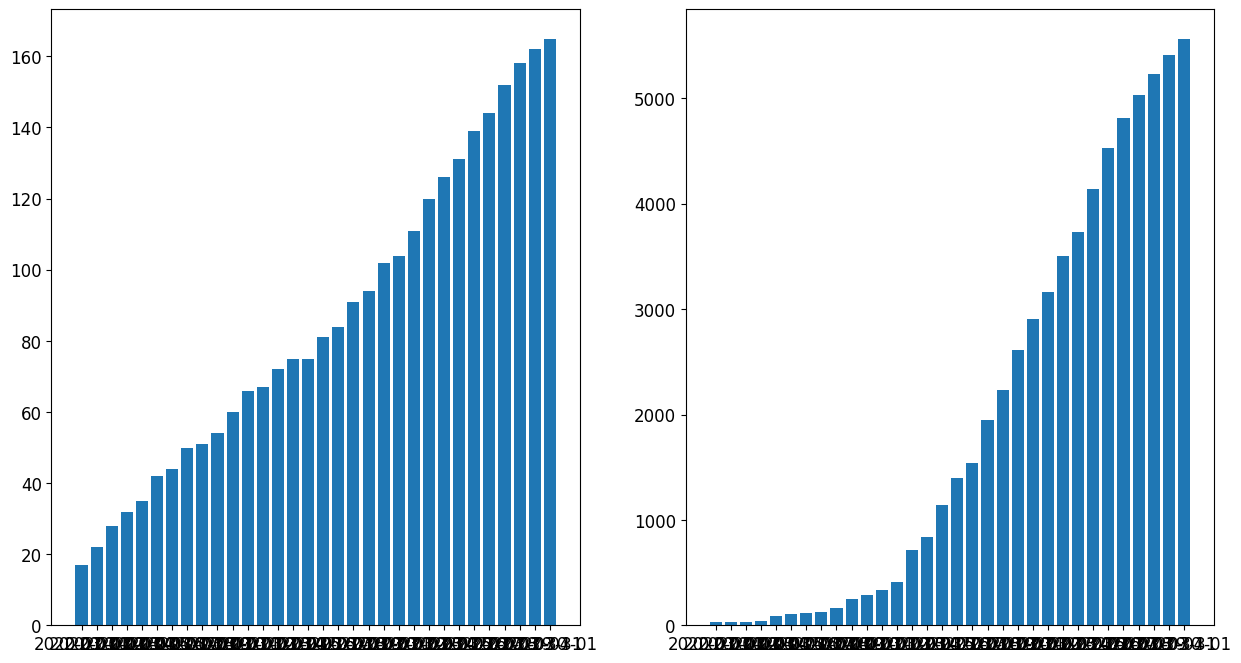

In [274]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.bar(death.index, death)
# d_p

plt.subplot(1, 2, 2)
plt.bar(rec.index, rec)
# r_p

plt.show()

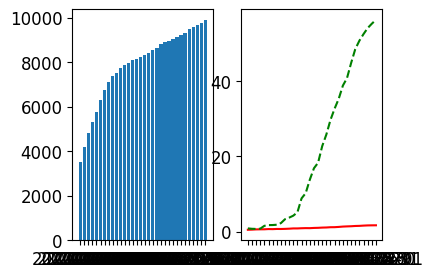

In [219]:
# 확진자
plt.subplot(1,2 ,1)
plt.bar(pos.index, pos)
# plt,plot(pos) 선그래프

# 치사율, 완치율
plt.subplot(1,2 ,2)
plt.plot(d_p, '-r')
plt.plot(r_p, '--g')

plt.show()

# 확진자는 계속 증가한다.
# 사망, 격리해제 증가
# 확진자 증가와 완치자가 증가하는 경향이 훨씬 유사하다.

In [255]:
x1 = death.index
print(x1.shape)

y1 = np.array(death)
print(y1.shape)

y2 = np.array(d_p)
print(y2)

(32,)
(32,)
[0.48 0.52 0.58 0.6  0.61 0.67 0.65 0.7  0.69 0.72 0.77 0.84 0.84 0.89
 0.92 0.91 0.97 1.   1.06 1.09 1.16 1.17 1.24 1.33 1.38 1.42 1.49 1.52
 1.59 1.64 1.66 1.67]


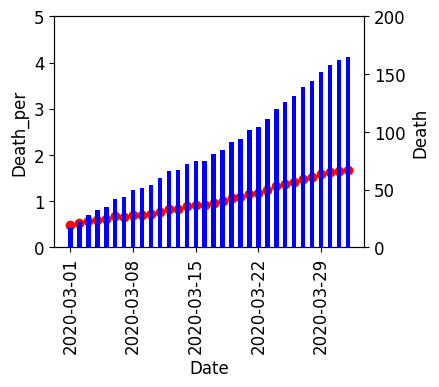

In [270]:
# 보조축을 이용하여 두 그래프 합치기
# 1. 데이터 준비
x1 = death.index
y1 = np.array(death)
y2 = np.array(d_p)

# 2. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x1, y2, 'or')
ax1.set_ylim(0, 5)           # 오른쪽 y축 범위
ax1.set_xlabel('Date')       # x축 범례
ax1.set_ylabel('Death_per')  # 왼쪽 y축 범례
plt.xticks(x1[::7],rotation=90)          # 7일 간격으로 x축 눈금 표시

ax2 = ax1.twinx()
ax2.bar(x1, y1, color='blue', width=0.5)
ax2.set_ylim(0, 200)
ax2.set_ylabel(r'Death')

plt.show()